### Case Study

#### South African Hearth data set

1: Description.

A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in Rousseauw et al, 1983, South African Medical Journal. 

The class label indicates if the person has a coronary heart disease: negative (0) or positive (1). 

Attributes description: 
- sbp: systolic blood pressure 
- tobacco: cumulative tobacco (kg) 
- ldl: low densiity lipoprotein cholesterol 
- adiposity 
- famhist: family history of heart disease (Present, Absent) 
- typea: type-A behavior 
- obesity 
- alcohol: current alcohol consumption 
- age: age at onset

2: Type.			Classification	

3: Origin.			Real world

4: Instances.		462

5: Features.		9

6: Classes.			2	

7: Missing values.	No


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('saheart.dat',sep = ',', header = 13, names = ['Sbp', 'Tobacco', 'Ldl', 'Adiposity',
                                                                'Famhist', 'Typea', 'Obesity', 'Alcohol', 'Age', 'Chd'])
df.head()

,Sbp,Tobacco,Ldl,Adiposity,Famhist,Typea,Obesity,Alcohol,Age,Chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


# Brief Exploration of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
Sbp          462 non-null int64
Tobacco      462 non-null float64
Ldl          462 non-null float64
Adiposity    462 non-null float64
Famhist      462 non-null object
Typea        462 non-null int64
Obesity      462 non-null float64
Alcohol      462 non-null float64
Age          462 non-null int64
Chd          462 non-null int64
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [5]:
df.Famhist.replace(['Absent', 'Present'], [0,1], inplace = True)

In [6]:
df.describe()

,Sbp,Tobacco,Ldl,Adiposity,Famhist,Typea,Obesity,Alcohol,Age,Chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


- Alcohol has a steep steps indicating a heavily skewed distribution
- Tobacco and Ldl also has a steep increase from the 75% to the max 

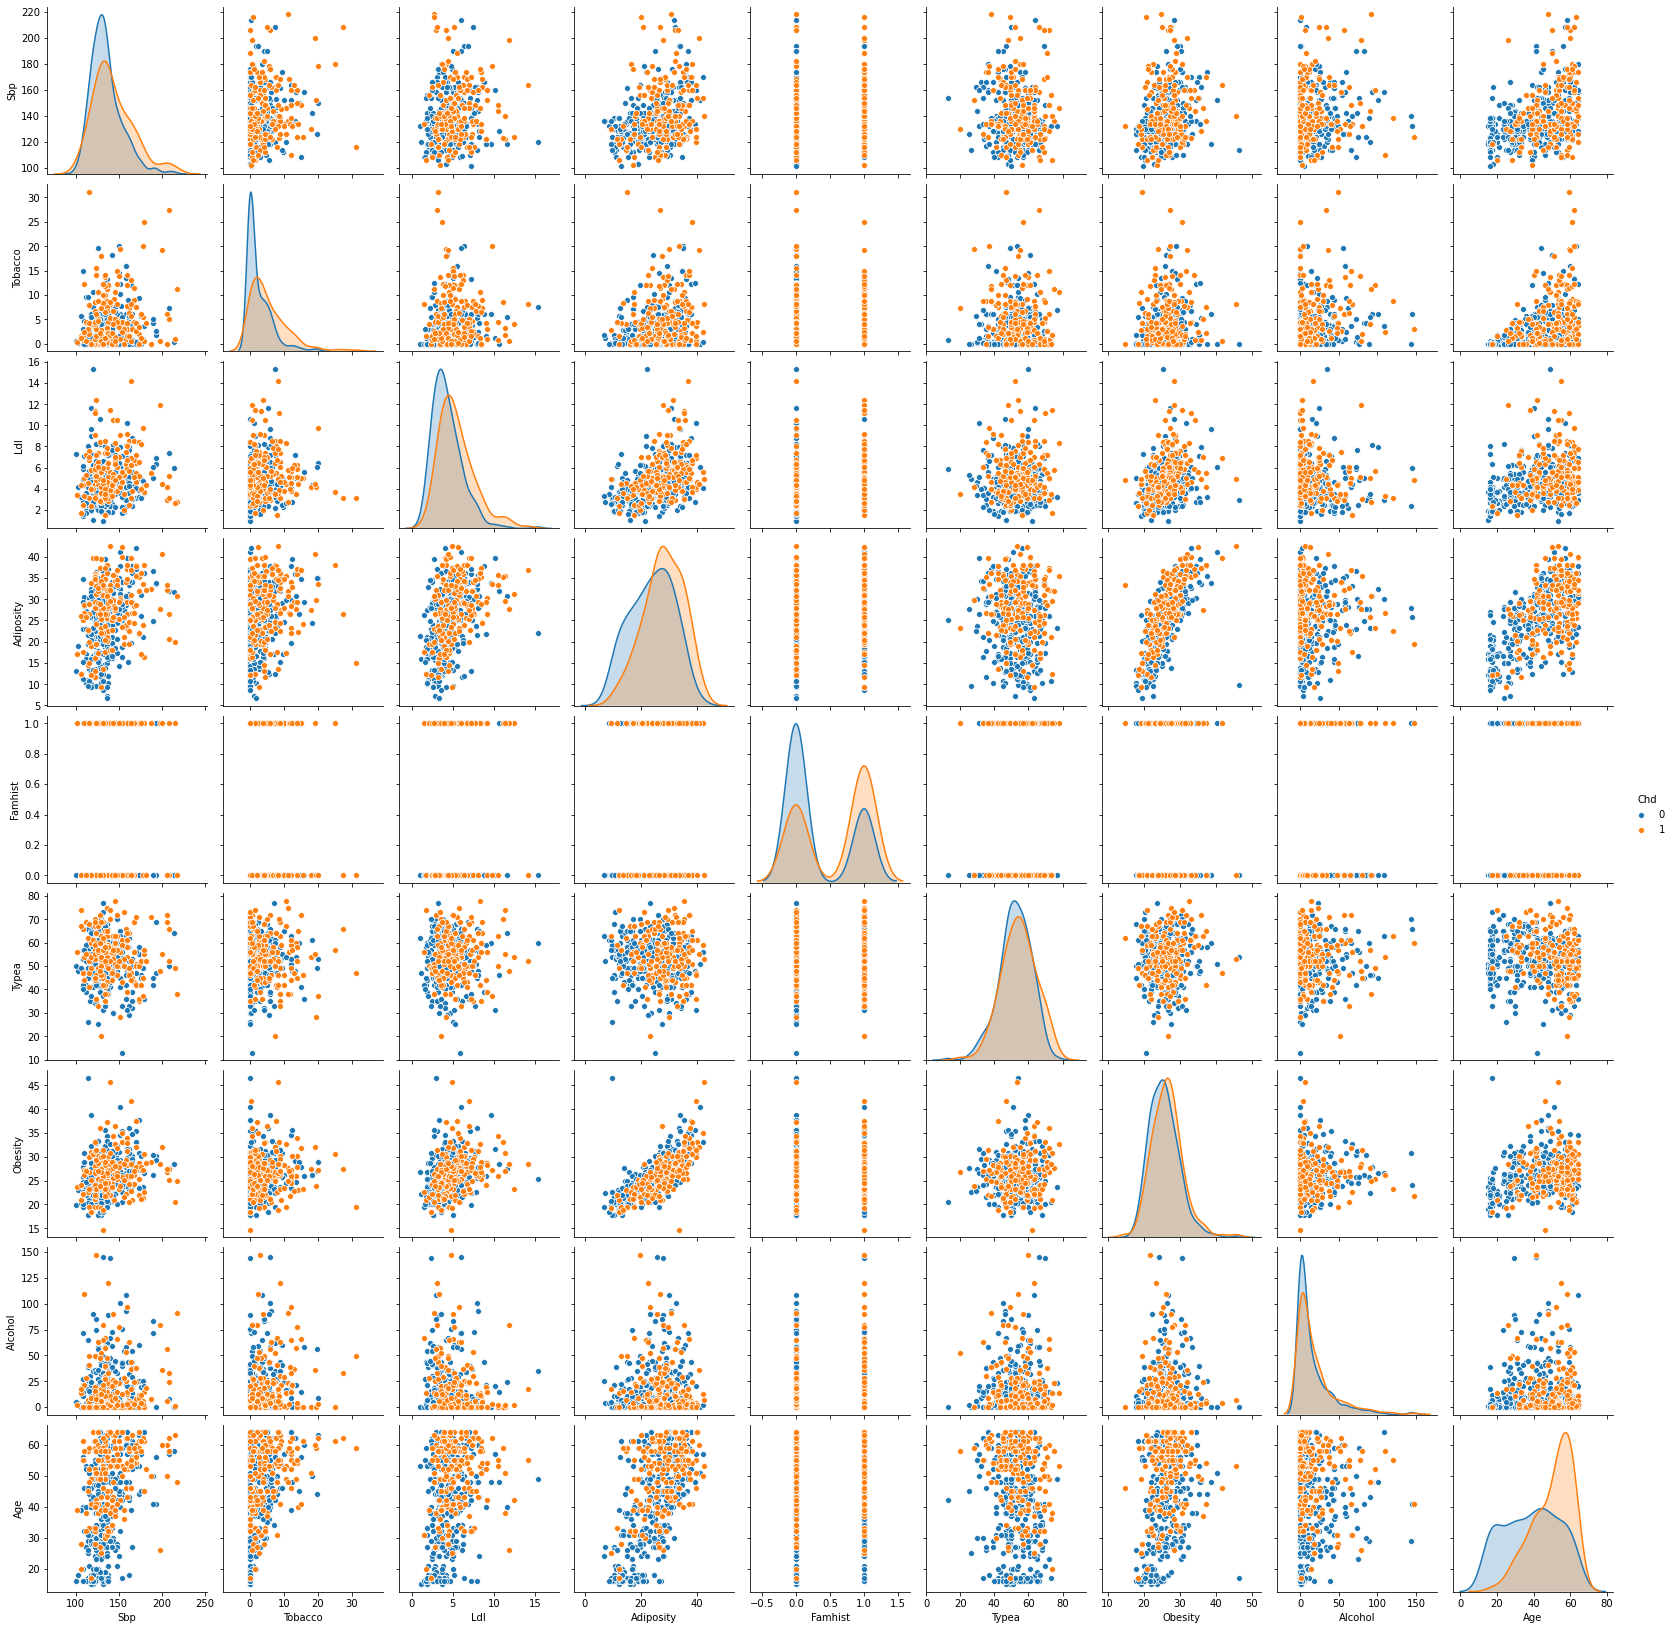

In [7]:
sns.pairplot(df, diag_kind= 'kde', hue = 'Chd')
plt.show()

- None of the predictors by themselves seem to have a strong relation with the target
- There is some linear relationship between Adiposity and Obesity

#### Outlier check

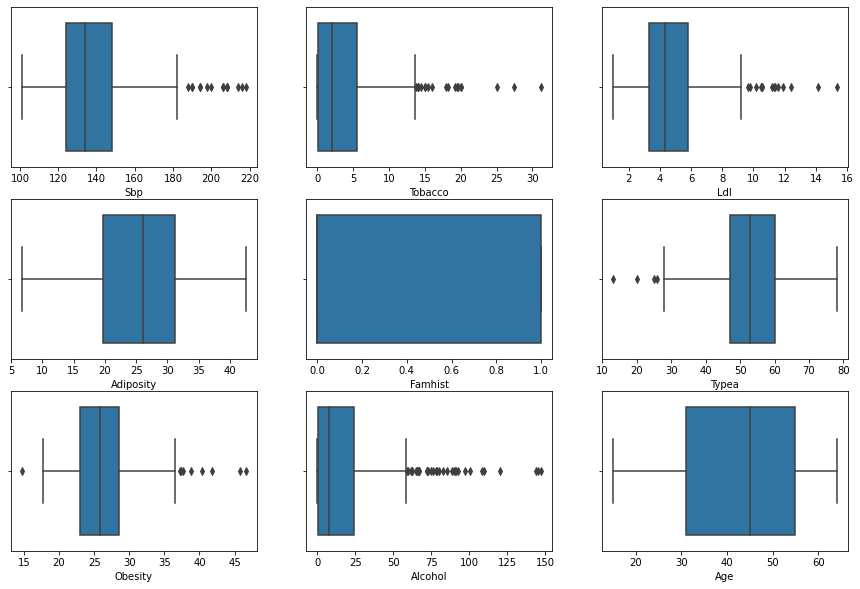

In [8]:
plt.figure(figsize=(15,10))
pos = 1
for i in df.drop(columns = 'Chd').columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(df[i])
    pos += 1 

- There are quiet a lot of outliers
- Lets treat them. But before that, we shall divide the entire data into train and test and treat only the train data, to maintain the sanctity of the test set

( try to use the dataset as it is, without treating the outliers and compare the performances of a given model, with and without outlier treatment)

#### Train test split

In [11]:
X = df.drop(columns= 'Age')
y = df.Age

In [12]:
y

0      52
1      63
2      46
3      58
4      49
       ..
457    58
458    52
459    55
460    40
461    46
Name: Age, Length: 462, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [11]:
for i in X_train.columns:
    q1, q2, q3 = X_train[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    a = X_train[i] > q3 + 1.5*IQR
    b = X_train[i] < q1 - 1.5*IQR
    X_train[i] = np.where(a | b, q2, X_train[i])  

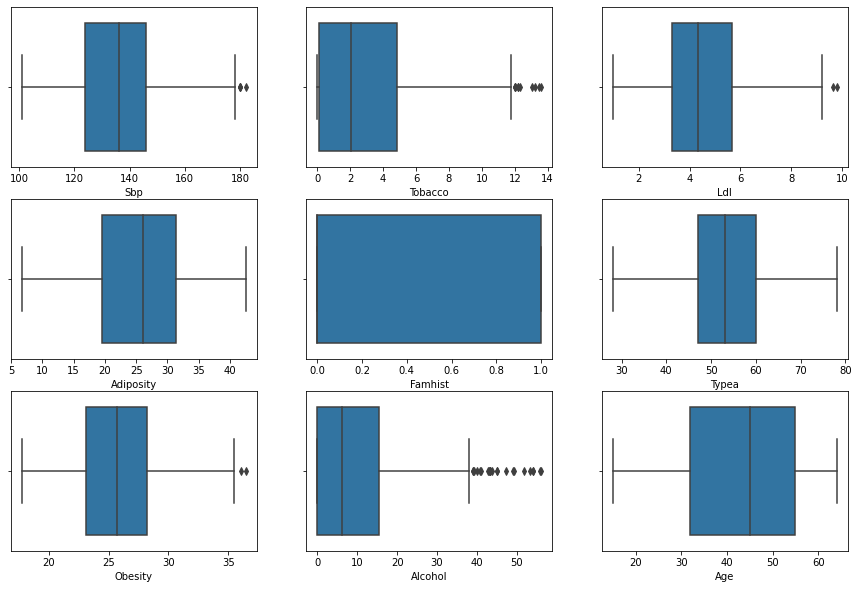

In [12]:
plt.figure(figsize=(15,10))
pos = 1
for i in X_train.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(X_train[i])
    pos += 1 

In [13]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
from sklearn.metrics import confusion_matrix

pred = logreg.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()

lr_score = logreg.score(X_test, y_test)
lr_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
lr_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
lr_specificity =round(tn/(tn+fp),3)    # Of all the people without Chds, how many were recognised to not have Chd

result = pd.DataFrame({'Model' : ['Logistic Regression'], 'Accuracy' : [lr_score], 'Precision' : [lr_precision],
                      'True positive rate' : [lr_recall], 'True negative rate' : [lr_specificity],
                       'False positive rate' :  [1-lr_specificity]})
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.68,0.531,0.869,0.131


Meh...

**What can we do to make it better????**

In [15]:
y_train.value_counts()

0    241
1    128
Name: Chd, dtype: int64

Smells like class imbalance, lets UP Sample!!! 

In [16]:
train = pd.concat([X_train, y_train], axis = 1)

extra_samples = train[train['Chd'] == 1].sample(n = 100, random_state = 1)

train_upsampled = pd.concat([train, extra_samples], axis = 0)

In [17]:
X_train = train_upsampled.drop(columns = 'Chd')
y_train = train_upsampled.Chd

X_train.shape

y_train.value_counts()

0    241
1    228
Name: Chd, dtype: int64

In [18]:
logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()

lr_score = logreg.score(X_test, y_test)
lr_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
lr_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
lr_specificity =round(tn/(tn+fp),3)    # Of all the people without Chds, how many were recognised to not have Chd

result = pd.DataFrame({'Model' : ['Logistic Regression'], 'Accuracy' : [lr_score], 'Precision' : [lr_precision],
                      'True positive rate' : [lr_recall], 'True negative rate' : [lr_specificity],
                       'False positive rate' :  [1-lr_specificity]})
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.75,0.754,0.246


- Accuracy remained the same but there is some good increase in the True positive rate 😃
- And some good decrease in the True negative rate 😐

What can we do? 
Lets see if we can improve the predicitons with a different threshold value

In [19]:
from sklearn.preprocessing import binarize
from sklearn.metrics import accuracy_score, roc_auc_score
 
t = 0.6   #threshold
proba = logreg.predict_proba(X_test)
pred_at_t = binarize(proba, t)[:,1]

tn, fp, fn, tp = confusion_matrix(y_test, pred_at_t).ravel()

lr_score = accuracy_score(y_test, pred_at_t)
lr_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
lr_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
lr_specificity =round(tn/(tn+fp),3)    # Of all the people without Chds, how many were recognised to not have Chd

result.loc[1] = [f'Logistic Regression(t={t})', lr_score, lr_precision, lr_recall, lr_specificity, 1-lr_specificity]
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.750,0.754,0.246
1,Logistic Regression(t=0.6),0.731183,0.630,0.531,0.836,0.164


- One could call that an improvement 🤐

#### If you can't change the model, CHANGE the model

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

pred = dt.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

dt_score = dt.score(X_test, y_test)
dt_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
dt_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
dt_specificity =round(tn/(tn+fp),3)    # Of all the people without Chds, how many were recognised to not have Chd

result.loc[2] = ['Decision Tree', dt_score, dt_precision, dt_recall, dt_specificity, 1-dt_specificity]
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.750,0.754,0.246
1,Logistic Regression(t=0.6),0.731183,0.630,0.531,0.836,0.164
2,Decision Tree,0.612903,0.417,0.312,0.770,0.230


In [21]:
# Lets change the max depth

dt = DecisionTreeClassifier(max_depth= 4, random_state=1)

dt.fit(X_train, y_train)

pred = dt.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

dt_score = dt.score(X_test, y_test)
dt_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
dt_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
dt_specificity =round(tn/(tn+fp),3)    # Of all the people without Chds, how many were recognised to not have Chd

result.loc[2] = ['Decision Tree', dt_score, dt_precision, dt_recall, dt_specificity, 1-dt_specificity]
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.750,0.754,0.246
1,Logistic Regression(t=0.6),0.731183,0.630,0.531,0.836,0.164
2,Decision Tree,0.741935,0.618,0.656,0.787,0.213


In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)

rf.fit(X_train, y_train)

pred = rf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

rf_score = rf.score(X_test, y_test)
rf_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
rf_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
rf_specificity =round(tn/(tn+fp),3) 

result.loc[3] = ['Random Forest', rf_score, rf_precision, rf_recall, rf_specificity, 1 - rf_specificity]
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.750,0.754,0.246
1,Logistic Regression(t=0.6),0.731183,0.630,0.531,0.836,0.164
2,Decision Tree,0.741935,0.618,0.656,0.787,0.213
3,Random Forest,0.698925,0.611,0.344,0.885,0.115


##### Let us implement GridSearach CV for hyperparameter tuning.

In [23]:
# Takes very long. The cell below has the best params that was obtained when this cell was executed. You can get the best parameters-
# by gs.best_params_

from sklearn.model_selection import GridSearchCV

grid = {'bootstrap': [True, False],
        'max_depth': [25, 50, 75, 100, None],
        'max_features': ['log2', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 400, 600]}

gs = GridSearchCV(estimator = RandomForestClassifier(random_state=1), param_grid = grid, cv = 5, n_jobs = -1, verbose = 2 )

gs.fit(X_train, y_train)




Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 10.3min finished
C:\Users\Rajet singh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'boo

In [24]:
gs.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=25, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [25]:
forest = RandomForestClassifier(bootstrap=False,
                                max_depth=20,
                                max_features='auto',
                                min_samples_leaf=1,
                                min_samples_split=2,
                                n_estimators=200,random_state=1)

forest.fit(X_train, y_train)

pred = forest.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

forest_score = forest.score(X_test, y_test)
forest_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
forest_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
forest_specificity =round(tn/(tn+fp),3) 

result.loc[4] = ['Random forest(tuned)', forest_score, forest_precision, forest_recall, forest_specificity, 1 - forest_specificity]
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.750,0.754,0.246
1,Logistic Regression(t=0.6),0.731183,0.630,0.531,0.836,0.164
2,Decision Tree,0.741935,0.618,0.656,0.787,0.213
3,Random Forest,0.698925,0.611,0.344,0.885,0.115
4,Random forest(tuned),0.688172,0.588,0.312,0.885,0.115


- Random forest does not seem like a good option for this data

In [26]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(random_state=1)

abc.fit(X_train, y_train)

pred = abc.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

abc_score = abc.score(X_test, y_test)
abc_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
abc_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
abc_specificity =round(tn/(tn+fp),3) 

result.loc[5] = ['AdaBoost', abc_score, abc_precision, abc_recall, abc_specificity, 1 - abc_specificity]
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.750,0.754,0.246
1,Logistic Regression(t=0.6),0.731183,0.630,0.531,0.836,0.164
2,Decision Tree,0.741935,0.618,0.656,0.787,0.213
3,Random Forest,0.698925,0.611,0.344,0.885,0.115
4,Random forest(tuned),0.688172,0.588,0.312,0.885,0.115
5,AdaBoost,0.655914,0.500,0.531,0.721,0.279


- Logistic regression gave us the best performance compared to all the other algorithms